In [3]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, tqdm, sys
from matplotlib.pyplot import *
import local, tools_cmbalm
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [4]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [10]:
#qids = ['boss_d03','boss_d04']
#qids = ['s16_d02','s16_d03']
qids = ['boss_d01','boss_01','boss_d02','boss_02','boss_d03','boss_03','boss_d04','boss_04','s16_d01','s16_d02','s16_d03']
#qids = ['boss_d01','boss_d02','boss_02','s16_d01','s16_d02','s16_d03']

In [11]:
aobj = {q: local.init_analysis_params(qid=q) for q in qids}
mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1]*local.Tcmb**2 for q in qids}
ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1]*local.Tcmb**2 for q in qids}
ocl  = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1]*local.Tcmb**2 for q in qids}

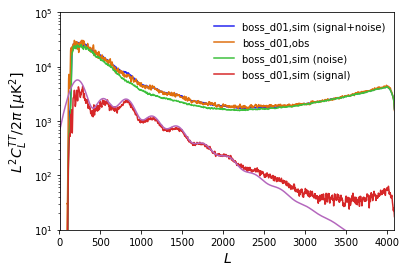

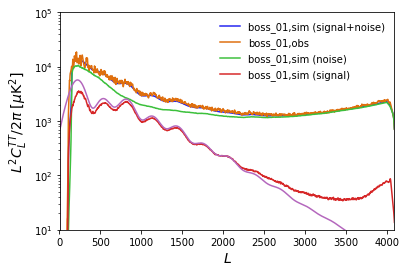

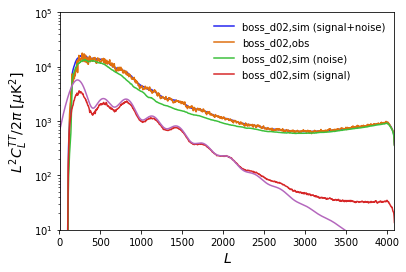

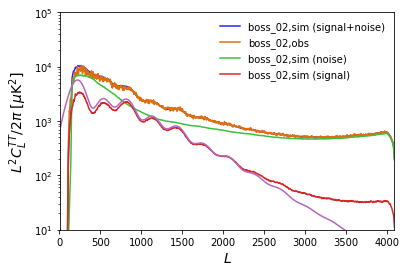

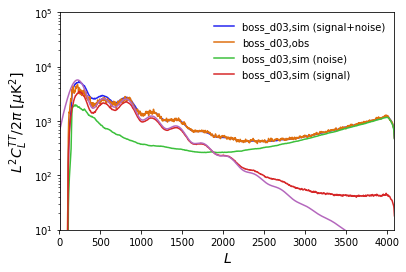

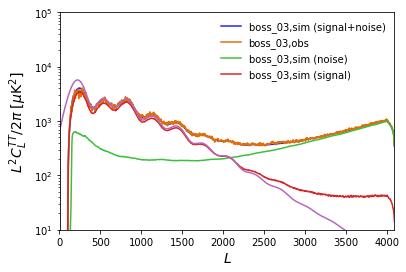

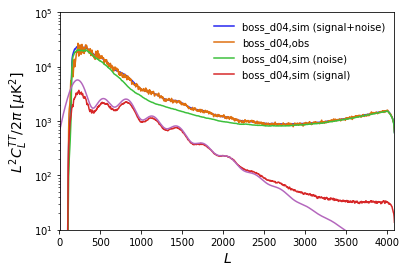

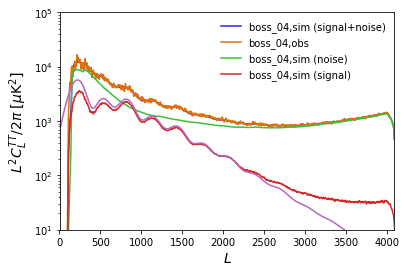

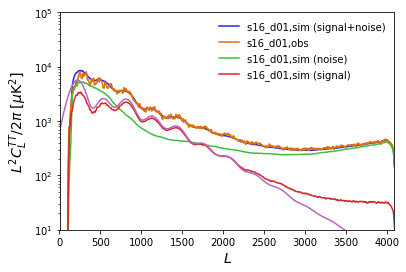

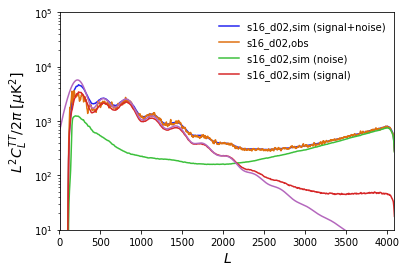

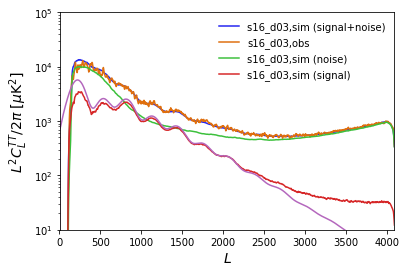

In [12]:
for q in qids:
    pl.plot_1dstyle(xmin=2,xmax=4096,ymin=1e1,ymax=1e5,xlab=r'$L$',ylab=r'$L^2 C^{TT}_L/2\pi$ [$\mu$K$^2$]',ylog=True)
    axhline(0)
    l = aobj[q].l
    s = l**2/2./np.pi
    scl = mcl[q] - ncl[q]
    plot(l,s*(scl+ncl[q]),label=q+',sim (signal+noise)')
    plot(l,s*ocl[q],label=q+',obs')
    plot(l,s*ncl[q],label=q+',sim (noise)')
    plot(l,s*(mcl[q]-ncl[q]),label=q+',sim (signal)')
    plot(l,l**2*aobj[q].lcl[0,:]/2/np.pi*local.Tcmb**2)
    legend()
    show()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


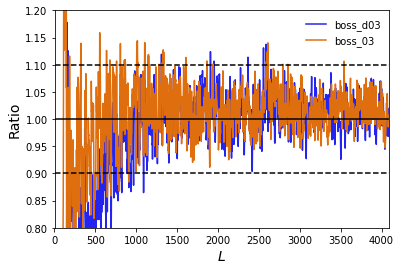

In [13]:
for q in ['boss_d03','boss_03']:
    pl.plot_1dstyle(xmin=2,xmax=4096,ymin=.8,ymax=1.2,ylab='Ratio')
    plot(aobj[q].l,ocl[q]/mcl[q],label=q)
axhline(1.,color='k',ls='-')
axhline(.9,color='k',ls='--')
axhline(1.1,color='k',ls='--')
legend()
show()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


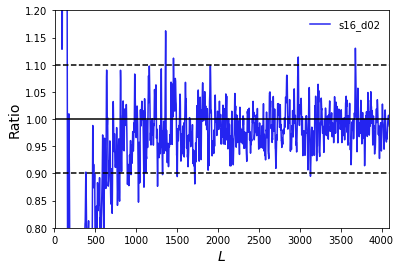

In [26]:
for q in ['s16_d02']:
    pl.plot_1dstyle(xmin=2,xmax=4096,ymin=.8,ymax=1.2,ylab='Ratio')
    plot(aobj[q].l,ocl[q]/mcl[q],label=q)
axhline(1.,color='k',ls='-')
axhline(.9,color='k',ls='--')
axhline(1.1,color='k',ls='--')
legend()
show()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


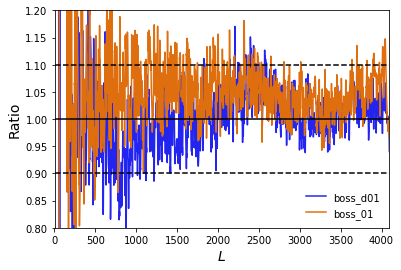

In [27]:
for q in ['boss_d01','boss_01']:
    pl.plot_1dstyle(xmin=2,xmax=4096,ymin=.8,ymax=1.2,ylab='Ratio')
    plot(aobj[q].l,ocl[q]/mcl[q],label=q)
axhline(1.,color='k',ls='-')
axhline(.9,color='k',ls='--')
axhline(1.1,color='k',ls='--')
legend()
show()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


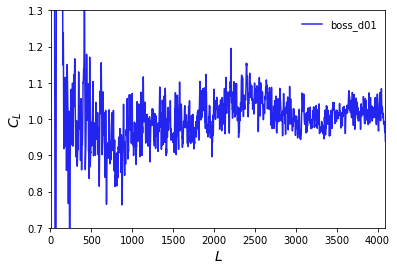

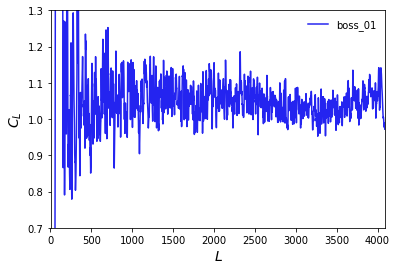

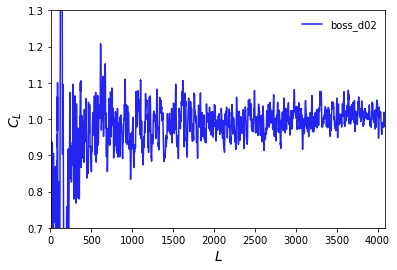

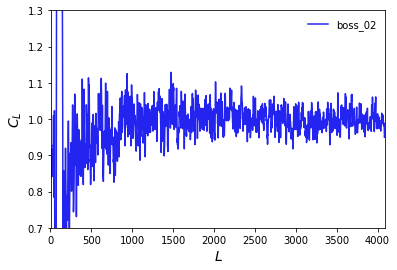

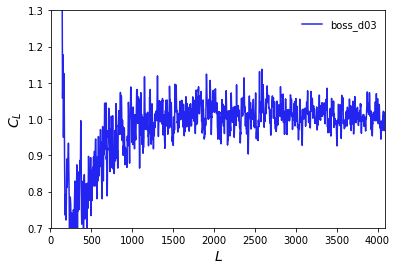

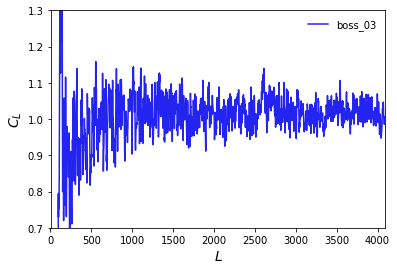

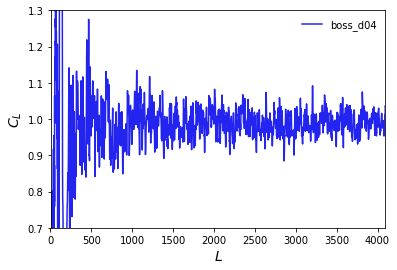

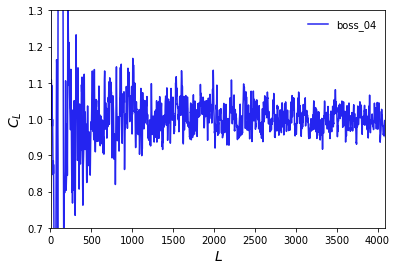

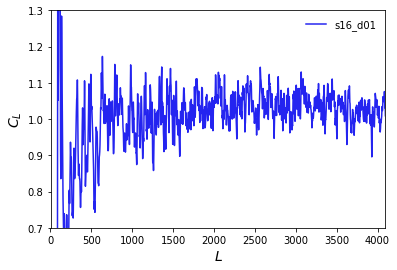

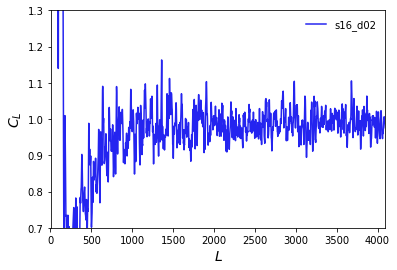

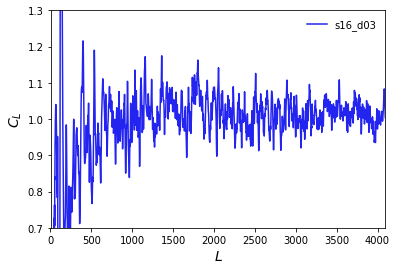

In [14]:
for q in qids:
    pl.plot_1dstyle(xmin=2,xmax=4096,ymin=.7,ymax=1.3)
    plot(aobj[q].l,ocl[q]/mcl[q],label=q)
    legend()
    show()

In [13]:
mb = binning.multipole_binning(30,lmin=2,lmax=4096)

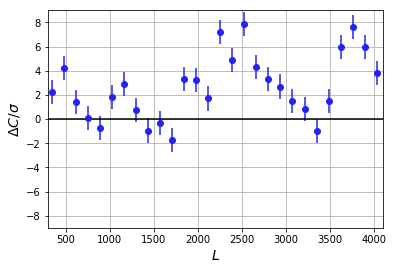

In [14]:
mcb, vcb, scb, ocb = binning.binned_spec(mb,aobj['boss_d01'].fcls_nul[:11],cn=1)
pl.plot_1dstyle(grid=True,xmin=300,xmax=4096,ymin=-9,ymax=9,ylab=r'$\Delta C/\sigma$')
errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o')
axhline(0,color='k')

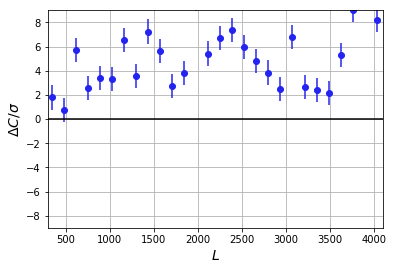

In [15]:
mcb, vcb, scb, ocb = binning.binned_spec(mb,aobj['boss_01'].fcls['c'][:11],cn=1)
pl.plot_1dstyle(grid=True,xmin=300,xmax=4096,ymin=-9,ymax=9,ylab=r'$\Delta C/\sigma$')
errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o')
axhline(0,color='k')

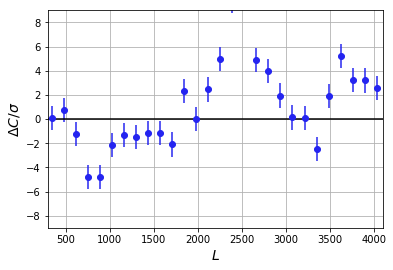

In [16]:
mcb, vcb, scb, ocb = binning.binned_spec(mb,aobj['boss_d01'].fcls['c'][:11],cn=1)
pl.plot_1dstyle(grid=True,xmin=300,xmax=4096,ymin=-9,ymax=9,ylab=r'$\Delta C/\sigma$')
errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o')
axhline(0,color='k')